# Tugas 7 - Diabetic Retinopathy

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
import pandas as pd
import numpy as np
import sklearn
from scipy.io import arff

In [44]:
%pwd

'/content/drive/My Drive/KULIAH/SEMESTER 5/Data Mining/datamining'

In [45]:
%cd /content/drive/MyDrive/KULIAH/SEMESTER 5/Data Mining/datamining

/content/drive/MyDrive/KULIAH/SEMESTER 5/Data Mining/datamining


In [46]:
data = arff.loadarff('messidor_features.arff')
dataset = pd.DataFrame(data[0])
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [47]:
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

In [48]:
dataset.columns = [col_names]
dataset

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class,label
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


In [49]:
X = dataset.drop(columns=['label'])
y = dataset['label'].values

In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

ybaru=le.transform(y)
ybaru

array([0, 0, 1, ..., 0, 1, 0])

# Metode KNN Tanpa Normalisasi

In [51]:
# Split data

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,ybaru, test_size=0.3, random_state=0)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Membuat k 1 sampai 25
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(xtrain,ytrain)
        y_pred=knn.predict(xtest)
        scores[k] = metrics.accuracy_score(ytest,y_pred)
        scores_list.append(metrics.accuracy_score(ytest,y_pred))

In [53]:
scores

{1: 0.6502890173410405,
 2: 0.6184971098265896,
 3: 0.615606936416185,
 4: 0.6473988439306358,
 5: 0.6242774566473989,
 6: 0.6184971098265896,
 7: 0.6416184971098265,
 8: 0.6271676300578035,
 9: 0.630057803468208,
 10: 0.6358381502890174,
 11: 0.653179190751445,
 12: 0.6242774566473989,
 13: 0.6502890173410405,
 14: 0.6271676300578035,
 15: 0.638728323699422,
 16: 0.6329479768786127,
 17: 0.6445086705202312,
 18: 0.6473988439306358,
 19: 0.6473988439306358,
 20: 0.6271676300578035,
 21: 0.638728323699422,
 22: 0.6358381502890174,
 23: 0.6416184971098265,
 24: 0.6358381502890174,
 25: 0.6329479768786127}

Text(0, 0.5, 'Testing Accuracy')

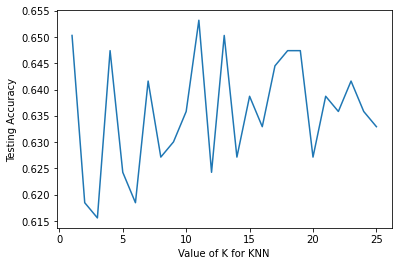

In [54]:
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Akurasi Tanpa Normalisasi

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64       156
           1       0.71      0.56      0.63       190

    accuracy                           0.63       346
   macro avg       0.64      0.64      0.63       346
weighted avg       0.65      0.63      0.63       346



In [56]:
from sklearn.metrics import accuracy_score
print(f'accuracy = {(accuracy_score(ytest, y_pred))*100}%')

accuracy = 63.29479768786127%


# Normalisasi dengan Min Max

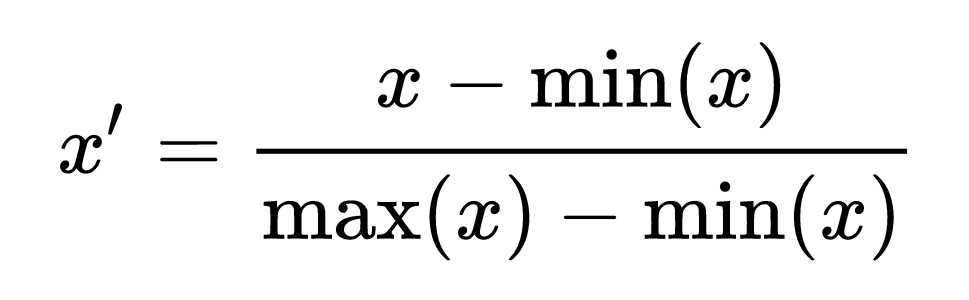

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler.fit(features)
#scaler.transform(features)
scaled = scaler.fit_transform(X)
features_names = X.columns.copy()
#features_names.remove('label')
scaled_features = pd.DataFrame(scaled, columns=features_names)
scaled_features.head(10)

,quality,prescreen,ma2,ma3,ma4,ma5,ma6,ma7,exudate8,exudate9,exudate10,exudate11,exudate12,exudate13,exudate14,exudate15,euDist,diameter,amfm_class
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0
5,1.0,1.0,0.286667,0.320611,0.336134,0.384615,0.375000,0.318182,0.069395,0.041498,0.021738,0.005417,0.000000,0.000000,0.000000,0.000000,0.601764,0.426770,0.0
6,1.0,0.0,0.186667,0.213740,0.235294,0.250000,0.250000,0.170455,0.037412,0.054531,0.015400,0.000000,0.000000,0.000000,0.000000,0.000000,0.775126,0.506339,0.0
7,1.0,1.0,0.033333,0.038168,0.042017,0.048077,0.010417,0.000000,0.050374,0.056828,0.011536,0.002516,0.000000,0.000000,0.000000,0.000000,0.929166,0.081622,1.0
8,1.0,1.0,0.140000,0.152672,0.142857,0.134615,0.125000,0.102273,0.164381,0.140880,0.057991,0.008305,0.000000,0.000000,0.000000,0.000000,0.589477,0.365093,0.0
9,1.0,1.0,0.520000,0.564885,0.605042,0.673077,0.656250,0.522727,0.053997,0.060159,0.008246,0.001670,0.000455,0.000000,0.000000,0.000000,0.860738,0.317608,0.0


# Save Model Normalisasi

In [58]:
import joblib
filename = "normalisasi.sav"
joblib.dump(scaler, filename) 

['normalisasi.sav']

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(scaled_features,ybaru, test_size=0.3, random_state=50)


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Membuat k 1 sampai 25
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(xtrain,ytrain)
        y_pred=knn.predict(xtest)
        scores[k] = metrics.accuracy_score(ytest,y_pred)
        scores_list.append(metrics.accuracy_score(ytest,y_pred))

In [61]:
scores

{1: 0.6184971098265896,
 2: 0.6271676300578035,
 3: 0.5924855491329479,
 4: 0.615606936416185,
 5: 0.5895953757225434,
 6: 0.6069364161849711,
 7: 0.6242774566473989,
 8: 0.6358381502890174,
 9: 0.6358381502890174,
 10: 0.6416184971098265,
 11: 0.5953757225433526,
 12: 0.6358381502890174,
 13: 0.6329479768786127,
 14: 0.653179190751445,
 15: 0.6416184971098265,
 16: 0.6473988439306358,
 17: 0.6184971098265896,
 18: 0.6329479768786127,
 19: 0.6242774566473989,
 20: 0.6329479768786127,
 21: 0.6416184971098265,
 22: 0.6560693641618497,
 23: 0.630057803468208,
 24: 0.661849710982659,
 25: 0.6473988439306358}

# Save model KNN Normalisasi

In [62]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=24)

In [63]:
filenameModelKnnNorm = 'modelKnnNormalisasi.pkl'
joblib.dump(knn, filenameModelKnnNorm)

['modelKnnNormalisasi.pkl']

Text(0, 0.5, 'Testing Accuracy')

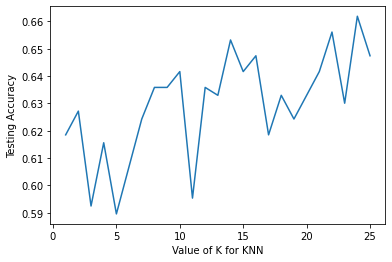

In [64]:
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Akurasi Dengan Normalisasi

In [65]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       179
           1       0.64      0.62      0.63       167

    accuracy                           0.65       346
   macro avg       0.65      0.65      0.65       346
weighted avg       0.65      0.65      0.65       346



In [66]:
from sklearn.metrics import accuracy_score
print(f'accuracy = {(accuracy_score(ytest, y_pred))*100}%')

accuracy = 64.73988439306359%


In [91]:
# Predict Input

a = np.array(dataset.iloc[:10,:-1])
test_data = np.array(a).reshape(10,-1)
pd.DataFrame(test_data)

# data_baru = [[1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.323,17.231,5.270,0.777,0.018,0.006,0.003,0.003,0.486,0.100,1.0]]

# pd.DataFrame(data_baru)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0
5,1.0,1.0,44.0,43.0,41.0,41.0,37.0,29.0,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0.0
6,1.0,0.0,29.0,29.0,29.0,27.0,25.0,16.0,15.448398,9.113819,1.633493,0.000000,0.000000,0.000000,0.000000,0.000000,0.541743,0.139575,0.0
7,1.0,1.0,6.0,6.0,6.0,6.0,2.0,1.0,20.679649,9.497786,1.223660,0.150382,0.000000,0.000000,0.000000,0.000000,0.576318,0.071071,1.0
8,1.0,1.0,22.0,21.0,18.0,15.0,13.0,10.0,66.691933,23.545543,6.151117,0.496372,0.000000,0.000000,0.000000,0.000000,0.500073,0.116793,0.0
9,1.0,1.0,79.0,75.0,73.0,71.0,64.0,47.0,22.141784,10.054384,0.874633,0.099780,0.023386,0.000000,0.000000,0.000000,0.560959,0.109134,0.0


In [92]:
# Load model normalisasi
scaler = joblib.load(filename)
test_d = scaler.fit_transform(test_data)
pd.DataFrame(test_d)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.219178,0.231884,0.238806,0.200000,0.258065,0.282609,0.672228,0.514778,0.395903,0.159051,0.013367,0.018390,0.093814,0.506586,0.109262,0.394775,1.0
1,0.0,1.0,0.246575,0.260870,0.238806,0.184615,0.225806,0.260870,0.824719,0.800841,0.237437,0.048263,0.002800,0.010457,0.093335,0.504003,0.448014,1.000000,0.0
2,0.0,1.0,0.767123,0.782609,0.791045,0.738462,0.725806,0.695652,0.788061,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.547593,0.783674,0.0
3,0.0,1.0,0.671233,0.681159,0.701493,0.676923,0.661290,0.652174,0.488234,0.546593,0.709330,0.634635,0.602818,0.729893,0.183012,0.197701,0.073210,0.596090,0.0
4,0.0,1.0,0.520548,0.550725,0.567164,0.538462,0.596774,0.565217,0.050306,0.077645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715828,0.0
5,0.0,1.0,0.520548,0.536232,0.522388,0.538462,0.564516,0.608696,0.251895,0.000000,0.154384,0.066716,0.000000,0.000000,0.000000,0.000000,0.267934,0.759036,0.0
6,0.0,0.0,0.315068,0.333333,0.343284,0.323077,0.370968,0.326087,0.000000,0.103436,0.099625,0.000000,0.000000,0.000000,0.000000,0.000000,0.655569,0.934022,0.0
7,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102086,0.121669,0.066244,0.030992,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
8,0.0,1.0,0.219178,0.217391,0.179104,0.138462,0.177419,0.195652,1.000000,0.788758,0.467597,0.102297,0.000000,0.000000,0.000000,0.000000,0.240459,0.623400,0.0
9,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130619,0.148101,0.037814,0.020564,0.016778,0.000000,0.000000,0.000000,0.846996,0.518972,0.0


In [93]:
# load model knn

knn = joblib.load(filenameModelKnnNorm)

In [94]:
inp_pred = knn.predict(test_d)
inp_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])